In [1]:
import pandas as pd #data processing
import numpy as np #linear algebra
import seaborn as sns #vizualization
from sklearn.linear_model import LogisticRegression #for Logistic Regression algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
from sklearn.neighbors import KNeighborsClassifier #for K nearest neighbours
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier #for Random Forests Classifiers and ExtraTreesClassifier
from sklearn import metrics #for checking the model accuracy
from sklearn.naive_bayes import GaussianNB #Naive Bayes model
from keras.models import Sequential #The Sequential model is a linear stack of layers
from keras.layers import Dense #regular densely-connected NN layer
from sklearn.preprocessing import StandardScaler, LabelBinarizer #for StandardScaler and LabelBinarizer
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
import matplotlib.pyplot as plt #library for draring charts
%matplotlib inline

Using TensorFlow backend.


In [2]:
iris = pd.read_csv("Iris.csv") #Load Data
iris.head() #View Top 5 records

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

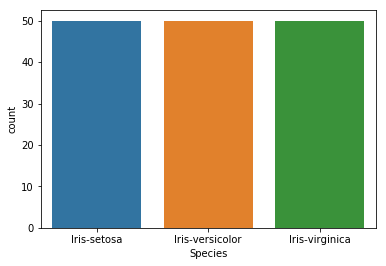

In [3]:
sns.countplot(x='Species',data=iris)
iris["Species"].value_counts()

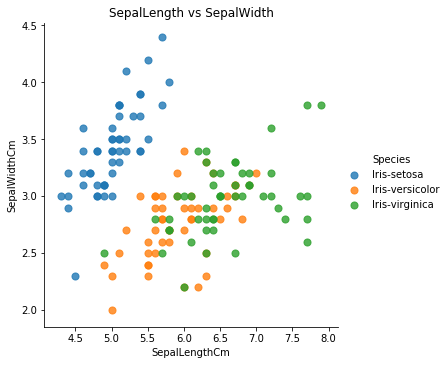

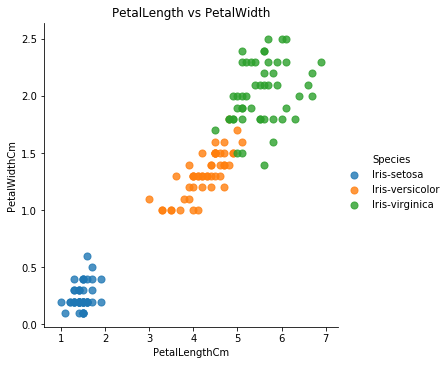

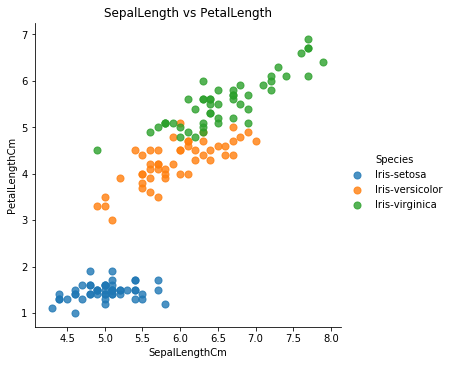

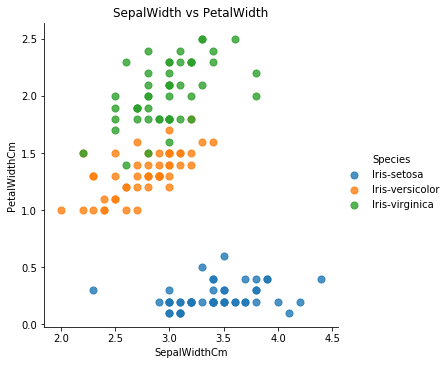

In [4]:
#Visualisation of the dataset

#The coding below shows the visualisation of the dataset in order to understand the data more. It can be seen that every species of the Iris can be segregated into different regions to be predicted.

sns.lmplot('SepalLengthCm', 'SepalWidthCm', data=iris, fit_reg=False, hue="Species", scatter_kws={"marker": "D", "s": 50})
plt.title('SepalLength vs SepalWidth')

sns.lmplot('PetalLengthCm', 'PetalWidthCm', data=iris, fit_reg=False, hue="Species", scatter_kws={"marker": "D", "s": 50})
plt.title('PetalLength vs PetalWidth')

sns.lmplot('SepalLengthCm', 'PetalLengthCm', data=iris, fit_reg=False, hue="Species", scatter_kws={"marker": "D", "s": 50})
plt.title('SepalLength vs PetalLength')

sns.lmplot('SepalWidthCm', 'PetalWidthCm', data=iris, fit_reg=False, hue="Species", scatter_kws={"marker": "D", "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


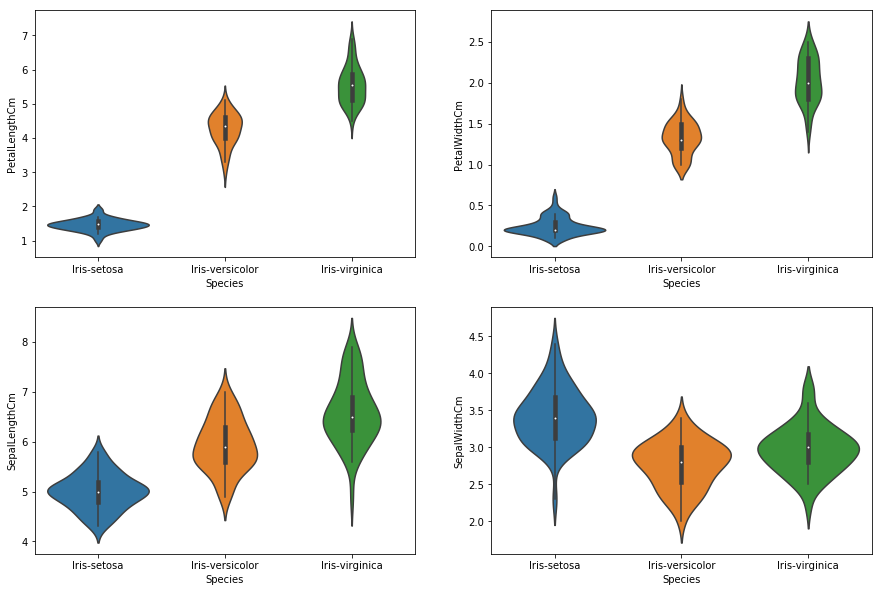

In [5]:
#Let's take a look at the Probability Density
#On each side of the gray line is a kernel density estimation to show the distribution shape of the data. the skinnier sections represent a lower probability.

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

In [6]:
#Spilit the training and test dataset

X = iris.drop(['Id', 'Species'], axis=1)
y = iris['Species']
print(X.shape)
print(y.shape)

#Splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 4)
(150,)
(105, 4)
(105,)
(45, 4)
(45,)


In [7]:
#Let's check the Train and Test Dataset
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
32,5.2,4.1,1.5,0.1
52,6.9,3.1,4.9,1.5
70,5.9,3.2,4.8,1.8
121,5.6,2.8,4.9,2.0
144,6.7,3.3,5.7,2.5


In [8]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
87,6.3,2.3,4.4,1.3
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2
91,6.1,3.0,4.6,1.4
49,5.0,3.3,1.4,0.2


In [9]:
y_train.head()

32         Iris-setosa
52     Iris-versicolor
70     Iris-versicolor
121     Iris-virginica
144     Iris-virginica
Name: Species, dtype: object

In [10]:
y_test.head()

87     Iris-versicolor
111     Iris-virginica
10         Iris-setosa
91     Iris-versicolor
49         Iris-setosa
Name: Species, dtype: object

In [11]:
logr = LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
acc_logr = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the Logistic Regression is:', acc_logr)

The accuracy of the Logistic Regression is: 0.8888888888888888


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [12]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc_dt = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the Decision Tree is', acc_dt)

The accuracy of the Decision Tree is 0.9777777777777777


In [13]:
sv = svm.SVC()
sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)
acc_sv = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the SVM is:', acc_sv)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy of the SVM is: 1.0


In [14]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
acc_knc = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the KNN is', acc_knc)

The accuracy of the KNN is 0.9777777777777777


In [15]:
etc = ExtraTreesClassifier()
etc.fit(X_train,y_train)
y_pred = etc.predict(X_test)
acc_etc = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the ExtraTreesClassifier is', acc_etc)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the ExtraTreesClassifier is 0.9555555555555556


In [16]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
acc_rfc = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the RandomForestClassifier is', acc_rfc)

The accuracy of the RandomForestClassifier is 0.9555555555555556


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc_gnb = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the Naive Bayes is:', acc_gnb)

The accuracy of the Naive Bayes is: 1.0


In [18]:
models = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machines', 'K-Nearest Neighbours', 'ExtraTreesClassifier', 'RandomForestClassifier', 'Gaussian Naive Bayes'],
    'Score': [acc_logr, acc_dt, acc_sv, acc_knc, acc_etc, acc_rfc, acc_gnb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Support Vector Machines,1.000000
6,Gaussian Naive Bayes,1.000000
1,Decision Tree,0.977778
3,K-Nearest Neighbours,0.977778
4,ExtraTreesClassifier,0.955556
5,RandomForestClassifier,0.955556
0,Logistic Regression,0.888889


In [19]:
#We firstly drop out unecessary column, axis=1. Then process normalization for features vector values and check it with showing first 5 lines:
iris.drop('Id',axis=1, inplace=True) #
df_norm = iris[iris.columns[0:4]].apply(lambda x:(x - x.min())/(x.max() - x.min()))
df_norm.sample(n=5)

#Encoding Species labels for use as a target in Neural Network and concatenating feature vectors and target vector in one.
target = iris[['Species']].replace(iris['Species'].unique(), [0,1,2])
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
37,0.166667,0.458333,0.084746,0.000000,0
82,0.416667,0.291667,0.491525,0.458333,1
32,0.250000,0.875000,0.084746,0.000000,0
6,0.083333,0.583333,0.067797,0.083333,0
72,0.555556,0.208333,0.661017,0.583333,1


In [20]:
#Selecting the target as y, and feature vectors as X
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

X = StandardScaler().fit_transform(X)
y = LabelBinarizer().fit_transform(y)

In [21]:
#Dividing data into train set and test set. We will do it 80/20.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [22]:
#Creating a model, adding a layer after layer
model = Sequential()
model.add(Dense(12, input_dim=4, activation = 'relu'))
model.add(Dense(units = 15, activation= 'relu'))
model.add(Dense(units = 8, activation= 'relu'))
model.add(Dense(units = 10, activation= 'relu'))
model.add(Dense(units = 3, activation= 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 120, validation_data = (x_test, y_test))

Train on 120 samples, validate on 30 samples
Epoch 1/120
120/120 [==============================] - 1s 11ms/step - loss: 1.1117 - accuracy: 0.2583 - val_loss: 1.0883 - val_accuracy: 0.3667
Epoch 2/120
120/120 [==============================] - 0s 217us/step - loss: 1.0916 - accuracy: 0.2917 - val_loss: 1.0728 - val_accuracy: 0.3667
Epoch 3/120
120/120 [==============================] - 0s 372us/step - loss: 1.0716 - accuracy: 0.3500 - val_loss: 1.0558 - val_accuracy: 0.4667
Epoch 4/120
120/120 [==============================] - 0s 403us/step - loss: 1.0532 - accuracy: 0.4917 - val_loss: 1.0390 - val_accuracy: 0.6333
Epoch 5/120
120/120 [==============================] - 0s 176us/step - loss: 1.0339 - accuracy: 0.6667 - val_loss: 1.0214 - val_accuracy: 0.6667
Epoch 6/120
120/120 [==============================] - 0s 246us/step - loss: 1.0146 - accuracy: 0.7583 - val_loss: 1.0040 - val_accuracy: 0.7667
Epoch 7/120
120/120 [==============================] - 0s 267us/step - loss: 0.9946 - 

Epoch 57/120
120/120 [==============================] - 0s 289us/step - loss: 0.1572 - accuracy: 0.9583 - val_loss: 0.1393 - val_accuracy: 1.0000
Epoch 58/120
120/120 [==============================] - 0s 366us/step - loss: 0.1515 - accuracy: 0.9583 - val_loss: 0.1353 - val_accuracy: 1.0000
Epoch 59/120
120/120 [==============================] - 0s 280us/step - loss: 0.1468 - accuracy: 0.9583 - val_loss: 0.1320 - val_accuracy: 1.0000
Epoch 60/120
120/120 [==============================] - 0s 361us/step - loss: 0.1420 - accuracy: 0.9500 - val_loss: 0.1302 - val_accuracy: 1.0000
Epoch 61/120
120/120 [==============================] - 0s 295us/step - loss: 0.1376 - accuracy: 0.9500 - val_loss: 0.1275 - val_accuracy: 1.0000
Epoch 62/120
120/120 [==============================] - 0s 287us/step - loss: 0.1334 - accuracy: 0.9500 - val_loss: 0.1217 - val_accuracy: 1.0000
Epoch 63/120
120/120 [==============================] - 0s 253us/step - loss: 0.1292 - accuracy: 0.9500 - val_loss: 0.1188 -

Epoch 113/120
120/120 [==============================] - 0s 196us/step - loss: 0.0432 - accuracy: 0.9833 - val_loss: 0.1028 - val_accuracy: 0.9667
Epoch 114/120
120/120 [==============================] - 0s 250us/step - loss: 0.0432 - accuracy: 0.9833 - val_loss: 0.1010 - val_accuracy: 0.9667
Epoch 115/120
120/120 [==============================] - 0s 224us/step - loss: 0.0431 - accuracy: 0.9833 - val_loss: 0.1023 - val_accuracy: 0.9667
Epoch 116/120
120/120 [==============================] - 0s 146us/step - loss: 0.0428 - accuracy: 0.9833 - val_loss: 0.1043 - val_accuracy: 0.9667
Epoch 117/120
120/120 [==============================] - 0s 316us/step - loss: 0.0413 - accuracy: 0.9833 - val_loss: 0.1169 - val_accuracy: 0.9333
Epoch 118/120
120/120 [==============================] - 0s 321us/step - loss: 0.0432 - accuracy: 0.9833 - val_loss: 0.1210 - val_accuracy: 0.9333
Epoch 119/120
120/120 [==============================] - 0s 257us/step - loss: 0.0420 - accuracy: 0.9833 - val_loss: 0

In [23]:
prediction = model.predict(x_test)
length = len(prediction)
y_label = np.argmax(y_test,axis=1)
predict_label = np.argmax(prediction,axis=1)
accuracy = np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset -",accuracy)

Accuracy of the dataset - 96.66666666666667


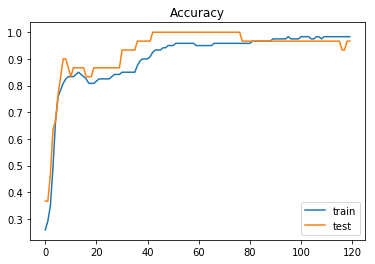

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()

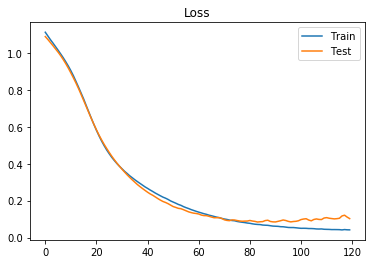

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['Train','Test'])
plt.show()